In [1]:
from keras.datasets.mnist import load_data
# ((x_train, y_train), (x_test, y_test))
(x_train, y_train), (x_test, y_test) = load_data()

Using TensorFlow backend.


In [2]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


答案是: 3


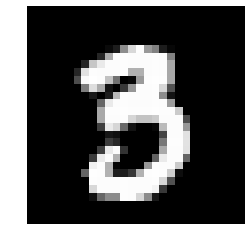

In [3]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
c = random.randint(0, x_train.shape[0]-1)
print("答案是:", y_train[c])
plt.axis("off")
plt.imshow(x_train[c], cmap="gray")

In [4]:
import pandas as pd
pd.DataFrame(x_train[c])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,7,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,38,...,130,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,38,198,234,...,168,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,38,225,253,252,...,168,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,76,250,255,253,...,168,0,0,0,0,0,0,0,0,0


In [5]:
from keras.models import Sequential
from keras.layers import Dense
mlp = Sequential()
# 784 * 256 + 256(bias)
mlp.add(Dense(256, activation="relu", input_dim=784))
# 256 * 10 + 10(bias)
mlp.add(Dense(10, activation="softmax"))
mlp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [6]:
x_train_shape = x_train.reshape(60000, 784) / 255
x_test_shape = x_test.reshape(10000, 784) / 255

In [7]:
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
print("原本:", y_train[0])
print("後來:", y_train_cat[0])

原本: 5
後來: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [8]:
mlp.compile(optimizer="adam",
            loss="categorical_crossentropy", 
            metrics=["accuracy"])

In [9]:
mlp.fit(x_train_shape, y_train_cat,
        batch_size=200, epochs=15,
        verbose=2, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/15
 - 2s - loss: 0.3711 - acc: 0.8969 - val_loss: 0.1563 - val_acc: 0.9598
Epoch 2/15
 - 1s - loss: 0.1612 - acc: 0.9541 - val_loss: 0.1155 - val_acc: 0.9685
Epoch 3/15
 - 1s - loss: 0.1136 - acc: 0.9679 - val_loss: 0.0993 - val_acc: 0.9715
Epoch 4/15
 - 1s - loss: 0.0874 - acc: 0.9744 - val_loss: 0.0881 - val_acc: 0.9760
Epoch 5/15
 - 1s - loss: 0.0683 - acc: 0.9805 - val_loss: 0.0758 - val_acc: 0.9780
Epoch 6/15
 - 1s - loss: 0.0551 - acc: 0.9845 - val_loss: 0.0795 - val_acc: 0.9775
Epoch 7/15
 - 1s - loss: 0.0450 - acc: 0.9876 - val_loss: 0.0699 - val_acc: 0.9793
Epoch 8/15
 - 1s - loss: 0.0362 - acc: 0.9906 - val_loss: 0.0715 - val_acc: 0.9795
Epoch 9/15
 - 1s - loss: 0.0301 - acc: 0.9919 - val_loss: 0.0691 - val_acc: 0.9808
Epoch 10/15
 - 1s - loss: 0.0250 - acc: 0.9937 - val_loss: 0.0654 - val_acc: 0.9805
Epoch 11/15
 - 1s - loss: 0.0205 - acc: 0.9954 - val_loss: 0.0673 - val_acc: 0.9813
Epoch 12/15
 - 1s - loss: 0.0170 - a

In [10]:
mlp.evaluate(x_test_shape, y_test_cat)

10000/10000 [==============================] - 0s 19us/step


[0.0678401957560447, 0.9796]

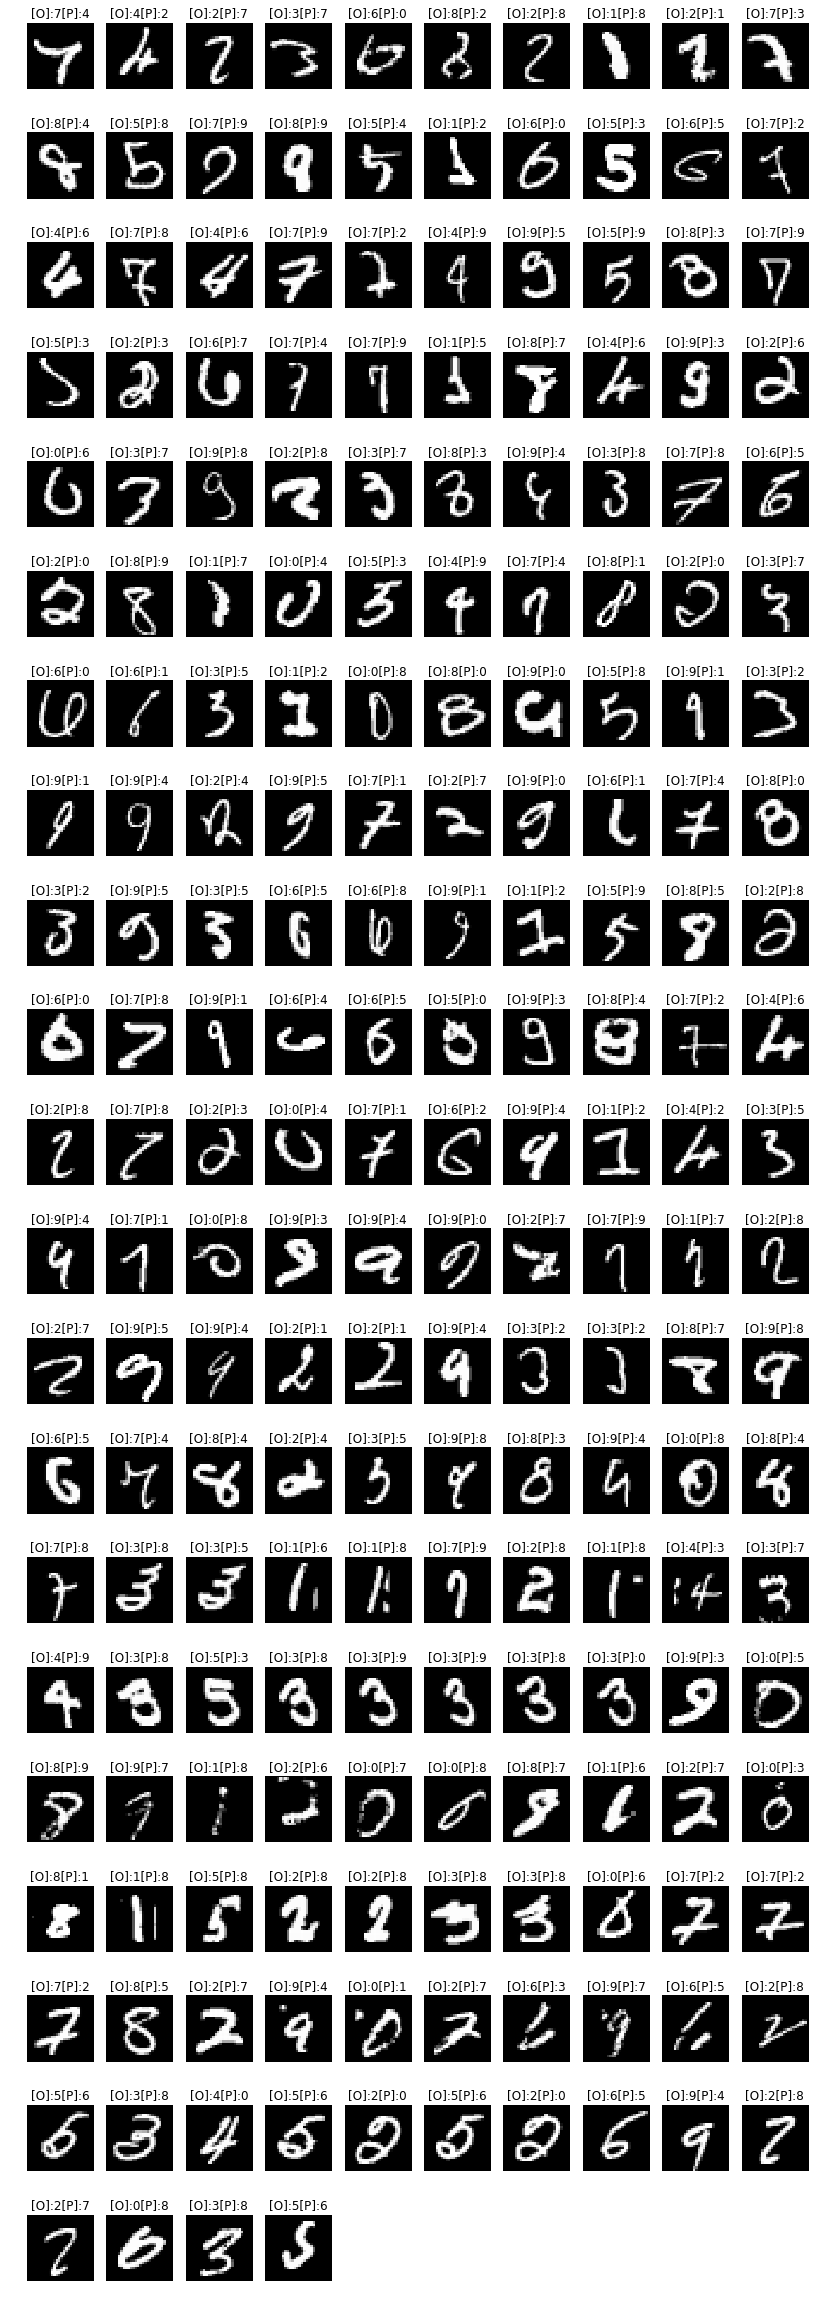

In [21]:
import numpy as np
pre = mlp.predict_classes(x_test_shape)
# 找出不一樣的預測的index
idx = np.nonzero(y_test != pre)[0]
# 把所有不一樣的圖片拿出來
false_img = x_test[idx]
false_ori_label = y_test[idx]
false_pre_label = pre[idx]
plt.figure(figsize=(14, 42))
width = 10
height = len(false_img) // width + 1
for i, img in enumerate(false_img):
    plt.subplot(height, width, i+1)
    msg = "[O]:" + str(false_ori_label[i]) + "[P]:" + str(false_pre_label[i])
    plt.title(msg)
    plt.axis("off")
    plt.imshow(img, cmap="gray")

In [22]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, pre))

,0,1,2,3,4,5,6,7,8,9
0,967,1,0,1,2,1,2,1,5,0
1,0,1121,4,0,0,1,2,2,5,0
2,4,3,1001,2,2,0,2,8,10,0
3,1,0,4,984,0,5,0,5,9,2
4,1,0,2,1,971,0,4,0,0,3
5,1,0,0,4,1,877,4,0,3,2
6,4,2,1,1,1,7,940,1,1,0
7,0,3,6,1,5,0,0,1002,5,6
8,2,2,1,3,4,2,0,3,954,3
9,3,4,0,4,10,4,0,2,3,979


你要判別哪一張:test3.png
預測的答案: 3


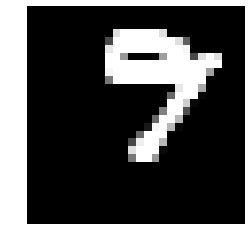

In [34]:
# Pillow(PIL)
from keras.preprocessing.image import load_img
fp = input("你要判別哪一張:")
img = np.array(load_img(fp, target_size=(28, 28)).convert("L"))
img_reshape = img.reshape(784) / 255
need_predict = np.array([img_reshape])
print("預測的答案:", mlp.predict_classes(need_predict)[0])
plt.axis("off")
plt.imshow(img, cmap="gray")

In [35]:
mlp.save("mlp.h5")

In [36]:
# https://support.hdfgroup.org/products/java/release/download.html
from keras.models import load_model
loaded = load_model("mlp.h5")
loaded.evaluate(x_test_shape, y_test_cat)

10000/10000 [==============================] - 0s 23us/step


[0.0678401957560447, 0.9796]